## **1. Daten laden über die OECD API** ##

In [1]:
from utils.oecd_api_dataload import load_pharmaceutical_consumption

df = load_pharmaceutical_consumption()

Verfügbare ATC-Codes aus der OECD API:
A, A02A, A02B, A10, A10A, A10B, A10X, B, C, C01A, C01B, C02, C03, C07, C08, C09, C10, G, G03, H, J, J01, M, M01A, N, N02, N05A, N05B, N05C, N06A, N06D, N07B, R, R03, _O, _T, _Z
Lade Daten für ATC-Code A (1/37)
    -> erhalten: 683 Zeilen
Lade Daten für ATC-Code A02A (2/37)
    -> erhalten: 564 Zeilen
Lade Daten für ATC-Code A02B (3/37)
    -> erhalten: 773 Zeilen
Lade Daten für ATC-Code A10 (4/37)
    -> erhalten: 778 Zeilen
Lade Daten für ATC-Code A10A (5/37)
    -> erhalten: 333 Zeilen
Lade Daten für ATC-Code A10B (6/37)
    -> erhalten: 333 Zeilen
Lade Daten für ATC-Code A10X (7/37)
    -> erhalten: 108 Zeilen
Lade Daten für ATC-Code B (8/37)
    -> erhalten: 714 Zeilen
Lade Daten für ATC-Code C (9/37)
    -> erhalten: 717 Zeilen
Lade Daten für ATC-Code C01A (10/37)
    -> erhalten: 752 Zeilen
Lade Daten für ATC-Code C01B (11/37)
    -> erhalten: 756 Zeilen
Lade Daten für ATC-Code C02 (12/37)
    -> erhalten: 748 Zeilen
Lade Daten für ATC-Code 

### **1.1 Alternativer Zugriff auf die Daten über eine abgespeicherte CSV-Datei** ##

In [1]:
import utils.oecd_api_dataload as oad

df = oad.load_pharmaceutical_consumption_from_csv("data/pharma_consumption_20251215.csv")
print()
print(df.head())


CSV-Datei erfolgreich geladen aus data/pharma_consumption_20251215.csv

  REF_AREA REF_AREA_LABEL MEASURE               MEASURE_LABEL UNIT_MEASURE  \
0      AUS      Australia  PH_CON  Pharmaceutical consumption   DDD_10P3HB   
1      AUS      Australia  PH_CON  Pharmaceutical consumption   DDD_10P3HB   
2      AUS      Australia  PH_CON  Pharmaceutical consumption   DDD_10P3HB   
3      AUS      Australia  PH_CON  Pharmaceutical consumption   DDD_10P3HB   
4      AUS      Australia  PH_CON  Pharmaceutical consumption   DDD_10P3HB   

                                 UNIT_MEASURE_LABEL MARKET_TYPE  \
0  Defined daily dose per 1 000 inhabitants per day          _Z   
1  Defined daily dose per 1 000 inhabitants per day          _Z   
2  Defined daily dose per 1 000 inhabitants per day          _Z   
3  Defined daily dose per 1 000 inhabitants per day          _Z   
4  Defined daily dose per 1 000 inhabitants per day          _Z   

  MARKET_TYPE_LABEL PHARMACEUTICAL             PHARMACEU

### **1.2 Einfache explorative Datenanalyse (EDA)** ###

In [2]:
import utils.oecd_api_dataload as oad

oad.simple_eda(df)


21,983 Zeilen und 20 Spalten geladen für 34 ATC-Codes und 39 Länder.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   REF_AREA              21983 non-null  object 
 1   REF_AREA_LABEL        21983 non-null  object 
 2   MEASURE               21983 non-null  object 
 3   MEASURE_LABEL         21983 non-null  object 
 4   UNIT_MEASURE          21983 non-null  object 
 5   UNIT_MEASURE_LABEL    21983 non-null  object 
 6   MARKET_TYPE           21983 non-null  object 
 7   MARKET_TYPE_LABEL     21983 non-null  object 
 8   PHARMACEUTICAL        21983 non-null  object 
 9   PHARMACEUTICAL_LABEL  21983 non-null  object 
 10  UNIT_MULT             21983 non-null  int64  
 11  UNIT_MULT_LABEL       21983 non-null  object 
 12  TIME_PERIOD           21983 non-null  Int64  
 13  OBS_VALUE             21981 non-null  float64
 14 

### **1.3 Initiales Entfernen irrelevanter Spalten** ###

- entfernen von Spalten

In [3]:
import utils.data_preprocessing as dp

columns_to_drop, df_cleaned = dp.drop_irrelevant_columns(df)
print(f"Entfernte Spalten: {columns_to_drop}")
print(f"Relevante Spalten: {df_cleaned.columns.tolist()}")

Entfernte Spalten: ['REF_AREA_LABEL', 'MEASURE', 'MEASURE_LABEL', 'UNIT_MEASURE', 'UNIT_MEASURE_LABEL', 'MARKET_TYPE', 'MARKET_TYPE_LABEL', 'PHARMACEUTICAL_LABEL', 'UNIT_MULT', 'UNIT_MULT_LABEL', 'OBS_STATUS_LABEL', 'OBS_STATUS2_LABEL', 'OBS_STATUS3_LABEL']
Relevante Spalten: ['REF_AREA', 'PHARMACEUTICAL', 'TIME_PERIOD', 'OBS_VALUE', 'OBS_STATUS', 'OBS_STATUS2', 'OBS_STATUS3']


### **1.4 Überprüfung der Datenhomogenität der ATC-Codes** ###

- Auslesen der absoluten und relativen Anzahl an Zeilen mit einem Eintrag "D" für "definition differs" (D-Label)
- dieser Eintrag steht dafür, dass die Erhebungsmethode der Verbrauchsmengen unterschiedlich und somit die Zielgröße heterogen ist
- je niedriger der Anteil an solchen Einträgen pro ATC-Code, desto homogener sind die Verbrauchsmengen

8665 von 21983 Zeilen haben ein D-Label (39.42%)

Übersicht über D-Flags je ATC-Code:

                rows_with_D  rows_total   share_D
PHARMACEUTICAL                                   
J                        69         686  0.100583
J01                      95         719  0.132128
A10X                     31         108  0.287037
N06D                    109         333  0.327327
N05A                    109         333  0.327327
A02A                    186         564  0.329787
N07B                    111         332  0.334337
A10A                    112         333  0.336336
A10B                    112         333  0.336336
N05B                    288         721  0.399445
N05C                    288         714  0.403361
C01A                    307         752  0.408245
C01B                    309         756  0.408730
C02                     308         748  0.411765
C07                     321         772  0.415803
N02                     310         745  0.416107
C08          

/Users/tjark-sorenniemann/Documents/drug-demand-forecasting/final/utils/data_preprocessing.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


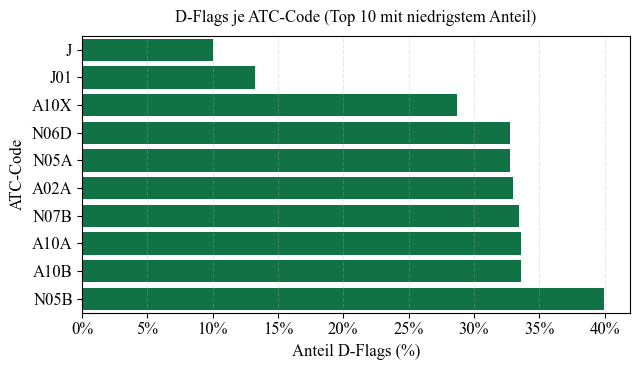

In [4]:
import utils.data_preprocessing as dp

report, total_d, total_rows, share_total = dp.compute_status_report(df_cleaned)

# Ausgabe der Ergebnisse als Tabelle
print(f'{total_d} von {total_rows} Zeilen haben ein D-Label ({share_total:.2f}%)')
print('\nÜbersicht über D-Flags je ATC-Code:')
print()
print(report.to_string())

# Visualisierung der Anteile
dp.plot_share_d(report)


**Auswahl des ATC-Codes J01 (Antibiotika) für das weitere Vorgehen, da:**
- die Daten besonders homogen sind (sehr niedriger Anteil von D-Flags)
- viele Beobachtungen vorliegen (höchste Anzahl an Beobachtungen im Vergleich zu ATC Codes mit unter 35 % D-Flag-Anteil)
- die ATC Klasse J01 (ATC Ebene 2) granularer ist als J (ATC Ebene 1) und somit präzisere Aussagen möglich sind


### **1.5 Datensatz bereinigen** ###

In [5]:
import utils.data_preprocessing as dp

# Auswahl des ATC-Codes der Ebene 2 mit dem niedrigsten Anteil an D-Flags
atc_code = dp.pick_lowest_atc_code(report)
print(f'Der ATC-Code der Ebene 2 mit dem niedrigsten Anteil an D-Flags ist {atc_code}.')

# Filtern des Datensatzes auf den ausgewählten ATC-Code
df_j01 = dp.filter_to_j01(df_cleaned)
print(f'\n-> der gefilterte Datensatz für {atc_code} enthält {len(df_j01)} Zeilen.')
print()
print(df_j01.head())

Der ATC-Code der Ebene 2 mit dem niedrigsten Anteil an D-Flags ist J01.

-> der gefilterte Datensatz für J01 enthält 719 Zeilen.

      REF_AREA PHARMACEUTICAL  TIME_PERIOD  OBS_VALUE OBS_STATUS OBS_STATUS2  \
13795      AUS            J01         1990       23.1          D         NaN   
13796      AUS            J01         1991       22.3          D         NaN   
13797      AUS            J01         1992       24.1          D         NaN   
13798      AUS            J01         1993       24.3          D         NaN   
13799      AUS            J01         1994       24.1          D         NaN   

      OBS_STATUS3  
13795         NaN  
13796         NaN  
13797         NaN  
13798         NaN  
13799         NaN  


### **1.6 Analyse des Datensatzes für J01** ###

Erstellen einer Tabelle mit einer Übersicht über die Eigenschaftenen der Zeitreihen aller enthaltenen Länder:
- Anfangs- und Endjahr der Zeitreihe
- Anzahl an Jahren in denen Verbrauchsmengen vorliegen
- Anzahl an Brüchen in den Zeitreihen (Eintrag "B" in einer der Beobachtungsspalten)
- Anzahl an Zeilen mit unterschiedlichen Definitionen für die Verbrauchsmengen 
- Anzahl an fehlenden Jahreseinträgen innerhalb einer Zeitreihe

In [10]:
import utils.data_preprocessing as dp

num_countries, coverage, defdiff_per_country, time_breaks_per_country, missing_counts, missing_years_per_country = dp.analyze_j01_dataset(df_j01)

print(f'{num_countries} Länder im Datensatz vertreten.')
print('\nZeitreihen je Land (Anfangsjahr, Endjahr, Anzahl an Perioden, Anzahl an Brüchen, Anzahl D-Flags, fehlende Jahre):')
print()
print(coverage.to_string())


39 Länder im Datensatz vertreten.

Zeitreihen je Land (Anfangsjahr, Endjahr, Anzahl an Perioden, Anzahl an Brüchen, Anzahl D-Flags, fehlende Jahre):

          min_year  max_year  n_periods  time_break_rows  defdiff_rows  missing_years
REF_AREA                                                                             
AUS           1990      2022         33                1            33              0
GRC           1997      2024         28                0             0              0
DNK           1997      2024         28                0             0              0
SWE           1997      2024         28                0             0              0
FRA           1997      2023         27                0             0              0
SVN           1997      2023         27                0             0              0
NLD           1997      2023         27                0             0              0
LUX           1997      2023         27                0             0      

### **1.6.1 Umgang mit Brüchen in den Zeitreihen** ###

- wenn innerhalb der Zeitreihe eines Landes ein Bruch vorliegt sind die Werte davor und danach nicht vergleichbar
- es entstehen künstliche Sprünge innerhalb der Zeitreihe 
- zur Vermeidung von Inkonsistenzen werden die Werte bis zum jüngsten Bruch innerhalb der Zeitreihe abgeschnitten

Länder mit Brüchen (Jahr des letzten Bruchs, alle Jahre mit Brüchen, bereinigte Zeilen bis zum letzten Bruch):

          last_break years_with_breaks  rows_cut
REF_AREA                                        
AUS             2013              2013        24
CAN             2016              2016        10
CRI             2007              2007         7
DEU             1991              1991         1
GBR             2023        2018, 2023        11
KOR             2016        2011, 2016         9


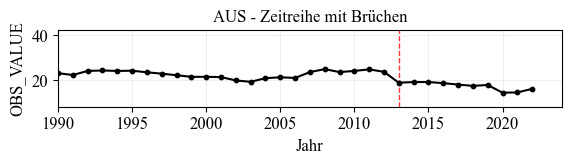

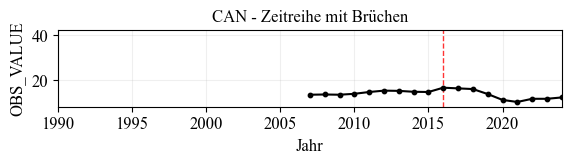

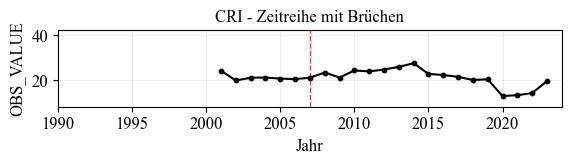

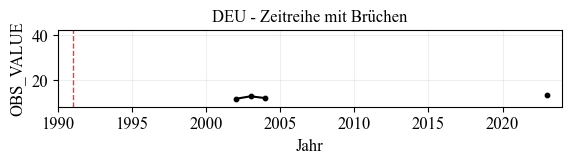

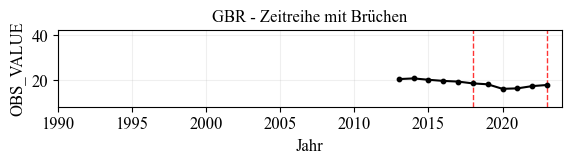

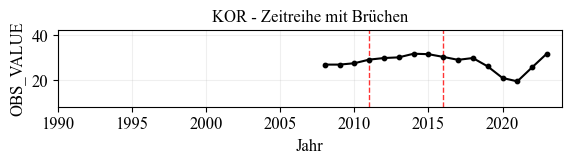


-> 657 Zeilen verbleiben nach dem Entfernen von 62 Zeilen aufgrund von Brüchen in den Zeitreihen.


In [7]:
import utils.data_preprocessing as dp

summary, df_j01_filtered, total_cut, break_years_by_area = dp.handle_time_series_breaks(df_j01)

# Tabelle mit Übersicht über Länder mit Brüchen und bereinigte Zeilen
print("Länder mit Brüchen (Jahr des letzten Bruchs, alle Jahre mit Brüchen, bereinigte Zeilen bis zum letzten Bruch):")
print()
print(summary.to_string())

# Visualisierung der Zeitreihen mit Brüchen
if summary.empty:
    print("Keine Brüche in den Zeitreihen gefunden.")
for ref_area in summary.index:
    dp.plot_series_with_breaks(
        df_j01,
        ref_area=ref_area,
        break_years_by_area=break_years_by_area
    )

print(f"\n-> {len(df_j01_filtered)} Zeilen verbleiben nach dem Entfernen von {total_cut} Zeilen aufgrund von Brüchen in den Zeitreihen.")

### **1.6.2 Umgang mit fehlenden Werten** ###

Länder mit fehlenden Werten (Anfangsjahr, Endjahr, Länge der Zeitreihe, Anzahl von Jahren mit Werten, Anzahl fehlender Werte, Quote fehlender Werte):

  country  first_year  last_year  series_length  observed_periods  missing_count  missing_quote                                                                                                 missing_years
0     DEU        2002       2023             22                 4             18       0.818182  [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
1     POL        1998       2023             26                16             10       0.384615                                                  [2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
2     ISL        1997       2023             27                20              7       0.259259                                                                    [2006, 2007, 2008, 2009, 2014, 2015, 2016]
3     ITA        2005    

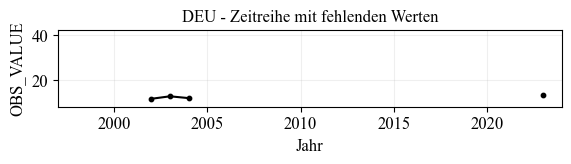

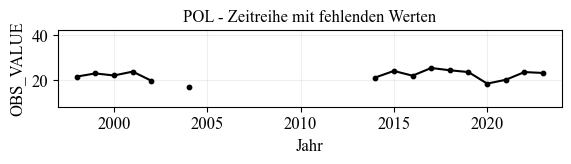

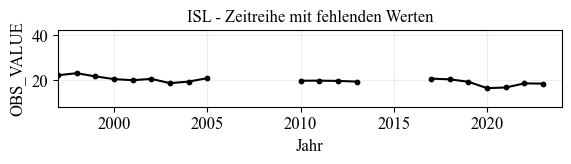

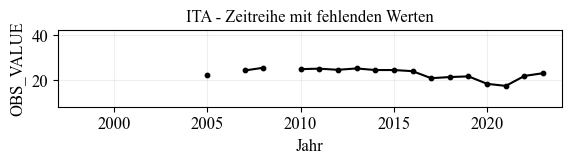

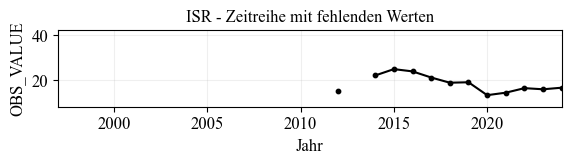

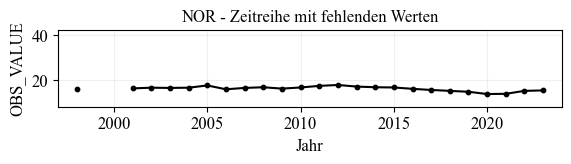

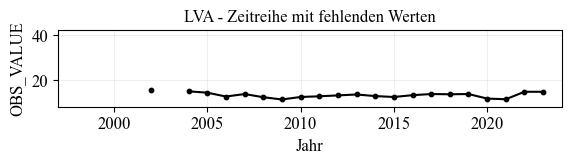

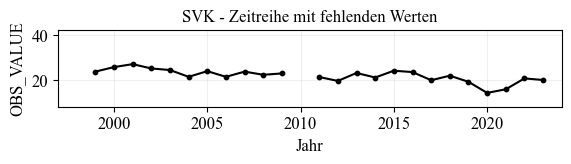

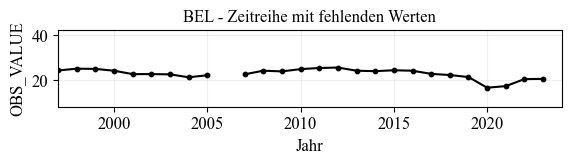

In [ ]:
import utils.data_preprocessing as dp

summary = dp.missing_data_handling(df_j01_filtered)

# Tabelle mit Übersicht über Länder mit fehlenden Werten
print('Länder mit fehlenden Werten (Anfangsjahr, Endjahr, Länge der Zeitreihe, Anzahl an Jahren mit Werten, Anzahl an fehlenden Werten, Quote fehlender Werte):')
print()
print(summary.to_string())

# Visualisierung der Zeitreihen mit fehlenden Werten
if summary.empty:
    print("Keine Missing Values in den Zeitreihen gefunden.")
else:
    for ref_area in summary["country"]:
        dp.plot_missing_data(
            df_j01_filtered,
            ref_area=ref_area
        )

### **Kürzen der Zeitreihen mit einer Quote an fehlenden Werten von mindestens 20 %** ###

- wenn die Quote an fehlenden Werten innerhalb der Zeitreihe eines Landes zu hoch ist (>= 20 %) dann soll die Zeitreihe so lange gekürzt werden, bis diese Quote nicht mehr überschritten wird
- mit Imputationsmethoden geschätzte Werte würden bei solch hohen Quoten die Datenqualität gefährden

In [9]:
import utils.data_preprocessing as dp

df_trimmed, cut_events, countries_above = dp.trim_by_missing_ratio(df_j01_filtered, threshold=0.2)
print('Länder mit einer Missing-Quote > 20 %:')
print(f'\n{countries_above.to_string()}')



Abgeschnittene Reihen (>20 % fehlend/ Zeitreihe):
- DEU: von Jahr 2002 bis 2022 entfernt
- ISL: von Jahr 1997 bis 2015 entfernt
- POL: von Jahr 1998 bis 2011 entfernt
Länder mit einer Missing-Quote > 20 %:

  country  first_year  last_year  series_length  observed_periods  missing_count  missing_quote                                                                                                 missing_years
0     DEU        2002       2023             22                 4             18       0.818182  [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
1     POL        1998       2023             26                16             10       0.384615                                                  [2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
2     ISL        1997       2023             27                20              7       0.259259                                                                    [2006, 2007